**bold text**
# CSCE 633 Spring 2021 (Total 100 pts)

**Machine Learning**

**Homework 3**

Instructor: Yoonsuck Choe

Mar 22, 2021


---

**Student name: ** Jayaraman, Nimoshika


---

# Common instructions (Read carefully)

**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```

# Section I: Entropy

Given a random variable $X$ that can take on values $\{ \oplus, \ominus \}$,
the entropy is defined as:

$$E(X) = - \sum_{x \in \{\oplus, \ominus\}} P(X=x) \log_2 P(X=x).$$

Since $P(X=\oplus) + P(X=\ominus) = 1$, $E(X)$ can be rewritten as a function of $P(X=\oplus)$, substituting $P(X=\ominus)$ with $1-P(X=\oplus)$.

Letting $p_\oplus = P(X=\oplus)$ in short:
$$ E(X) = f(p_\oplus) = -p_\oplus \log_2 p_\oplus - (1-p_\oplus) \log_2 (1 - p_\oplus). $$ Figure below shows how $f(p_\oplus)$ behaves as $p_\oplus$ changes.

<figure>
<center>
<img 
 src="https://drive.google.com/uc?export=view&id=1PRpDVWLHnLgs0GQyUU-L-_oAteRUKdM_" height="300px"> 
<figcaption>Figure 1. Entropy</figcaption></center>
</figure>

**Problem 1 (Written: 10 pts):**

Extend the above analysis to a random variable $Y$ that can take on values
$\{ \alpha, \beta, \gamma \}$. Given $p_\alpha = P(Y = \alpha)$, etc.,

(1) Derive $E(Y)$ as a function of $p_\alpha$ and $p_\beta$:

$$E(Y) = f(p_\alpha, p_\beta) = ... $$

Note: $p_\alpha+p_\beta+p_\gamma = 1.0$.

(2) For which values of  $p_\alpha$ and $p_\beta$ 
does $E(Y)$ become maximal (no need to derive it exactly from $f(p_\alpha,p_\beta)$--consider
when it is maximal in the 2-value case)?

(3) Explain why (you don't need to provide a formal proof).


**Answer:**

(1)

(2) for p(alpha) = 0.33 and p(beta) = 0.33 ,E(Y)- the uncertainity becomes maximum (1.5).

(3) When there are three values (alpha, beta and gamma) represented as a function of two values their individual probability becomes 1/3. so the maximum uncertainity occurs when they are all equally distributed in the data set. i.e. 0.33 in each case. The maximum entropy/uncertainity becomes 1.5 (when substituting 0.33 for both p(alpha) and p(beta)).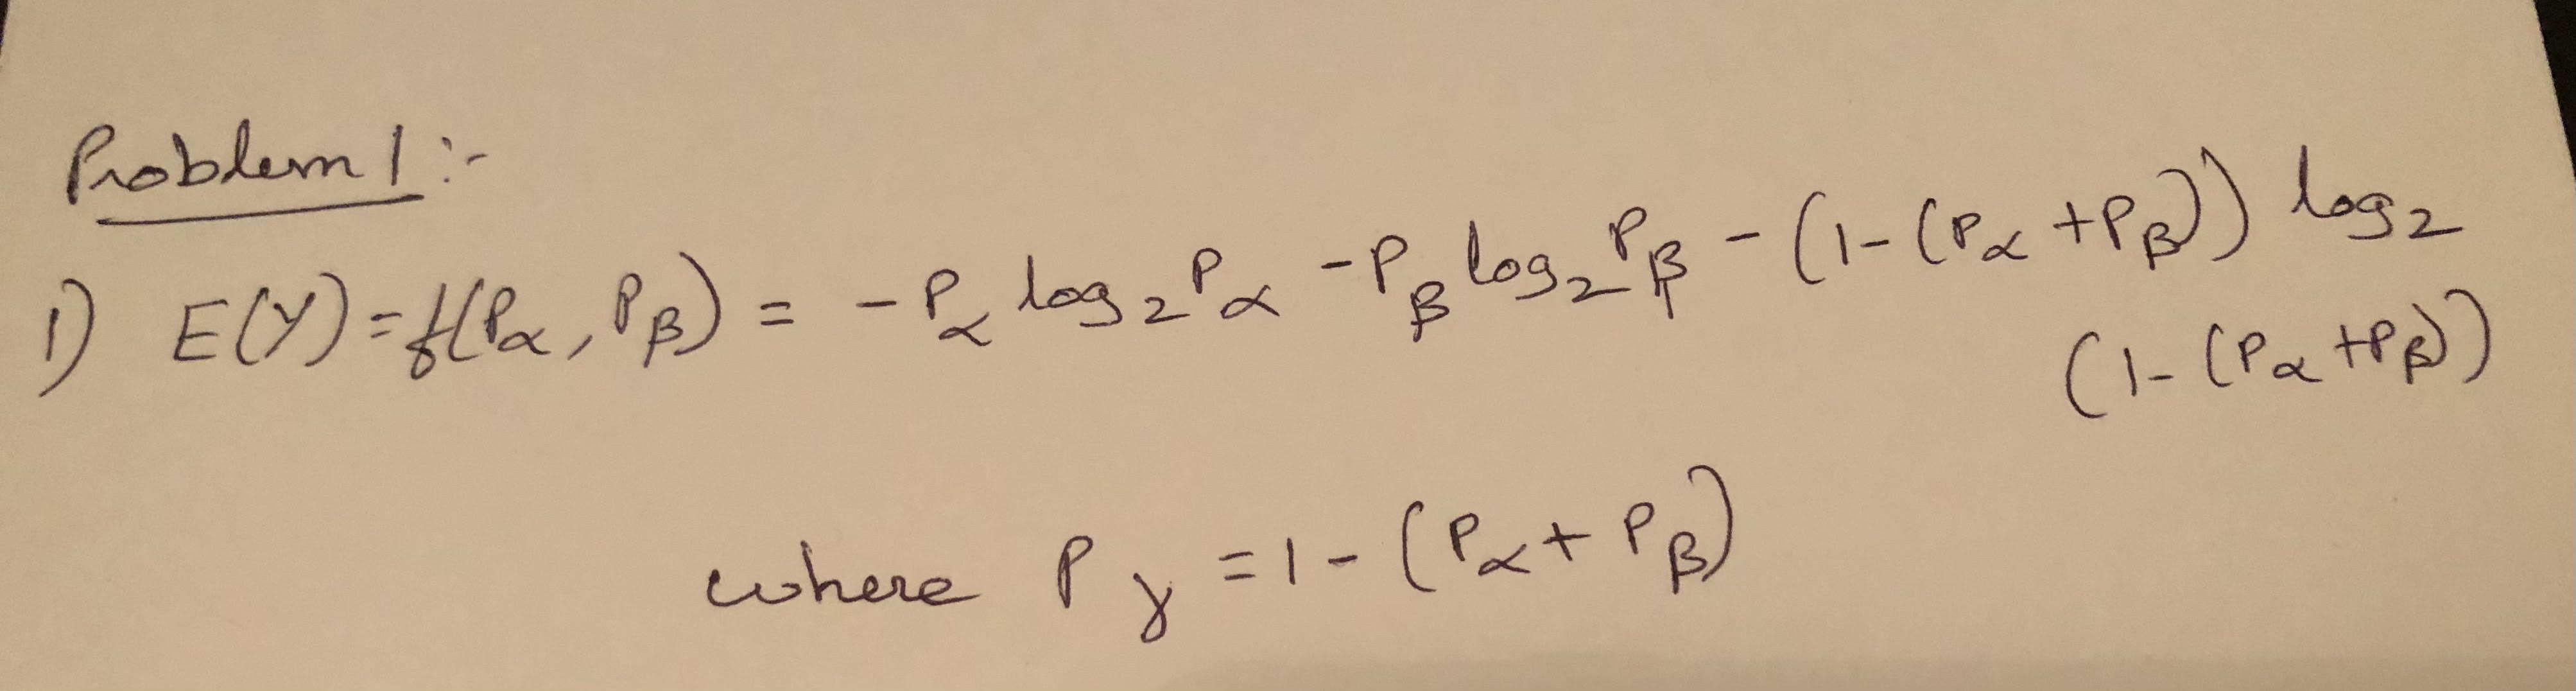 

**Problem 2 (Program: 20 pts)**

Write a short program to calculate $f(p_\alpha, p_\beta)$ derived above,
and obtain the $E(Y) = f(p_\alpha, p_\beta)$ values for all combinations of $p_\alpha, p_\beta \in \{ 0.0, 0.01, 0.02, ... , 0.99, 1.0 \}$, and plot in 3D (python: plot_surface; or draw by hand). You have to be careful because:

* log(0) will throw an error, so you have to check for the occurrence of (0 * log(0)) and make that 0 before log(0) gets evaluated. Alternatively, you can start with a value close to 0: 0.001, 0.01, 0.02,  ..., 0.99, 1.0.

* Also, you have to plot for the $(p_\alpha, p_\beta)$ that sums up to less than or equal to 1.0 (because $p_\alpha + p_\beta + p_\gamma =1$ must be maintained, and if $p_\alpha + p_\beta > 1$, then this constraint cannot be maintained).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Z contains NaN values. This may result in rendering artifacts.


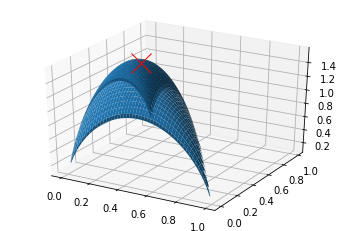

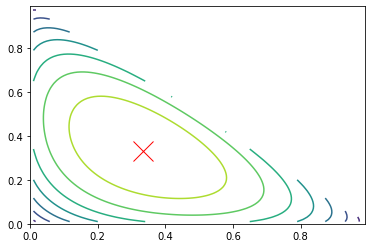

In [ ]:
# Write your code here.

import numpy as np
import matplotlib.pyplot as plt
import math

#-------------------
# Entropy function f(Pa,Pb) = E(Y)
#-------------------
def f(Pa, Pb):
  return -Pa * np.log2(Pa) - Pb * np.log2(Pb) - (1 - Pa - Pb) * np.log2(1 - Pa - Pb)



#-------------------
# Plot 
#-------------------
x = np.arange(0.0, 1.0, 0.01)
y = np.arange(0.0, 1.0, 0.01)
xx, yy = np.meshgrid(x, y)

#------
# 3D surface plot
#------

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,f(xx,yy),zorder=0)

# Mark point where E is maximum. 
ax.plot([1/3],[1/3],[f(1/3,1/3)],marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red",zorder=10)

#------
# show contour plot as well
#------

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.contour(xx,yy,f(xx,yy))
# Mark point where E is maximum. 

ax2.plot(1/3,1/3,marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red")




**Problem 3 (Written: 10pts)**

Based on the insight from above, when you have a random variable $X$ that can take on
four different discrete values (say, $\{a, b, c, d\}$), then (1) what should 
$P(X=a)$ etc. be so that the entropy of $X$ is maximized? (2) Also, what is the
value of the maximum entropy? (Note: You don't need to provide a formal proof.)


**Answer:**

(1) p(a), p(b), p(c) and p(d) should be each 0.25 for the entropy to be maximum. As there are 4 values , for it to be equally distributed, it should have a probability of 1/4 each to reach the maximum uncertainity/ entropy.

(2) Maximum entropy would be 2. when the equation of four differet discrete values are modified as a function of three values and when the individual values of probability are substituted as 0.25 each then the entropy becomes 2. i.e. the maximum uncertainity/entropy(2) happens when the inidividual probability is 0.25 each.  


# Section II: Decision Tree Learning

**Problem 4 (Written: 20pts)**

Calculate the following **by hand** and show all intermediate results 
(you may use a calculator for intermediate numerical results).

> TABLE 1

> Instance# | GPU | CPU | OS | Decision (Buy?)
> --- | --- | --- | --- | ---
> 1 | NVIDIA | Intel | ChromeOS | N
> 2 | Radeon | Intel | Linux | Y
> 3 | Don't care | AMD | Windows | Y
> 4 | NVIDIA | Intel | MS DOS | N
> 5 | Radeon | Intel | Windows | Y
> 6 | Radeon | Intel | MS DOS | N
> 7 | Radeon | AMD | Windows | N
> 8 | Radeon | AMD | Linux | Y
> 9 | Don’t care | AMD | ChromeOS | N
> 10 | NVIDIA | Intel | Linux | Y
> 11 | NVIDIA | AMD | ChromeOS | Y
> 12 | NVIDIA | AMD | Windows | N


(1) Calculate the entropy of the training set above. Hint: count positive and negative samples, and get their probabilities $p_\oplus$ and $p_\ominus$.

(2) Calculate the information gain for each of the three attributes. Hint: split the data set based on the attribute values for each attribute, and compute the information gain. For example, for the GPU attribute, there are three possible values: NVIDIA, Radeon, and Don't care. 

(3) Which one is the best attribute to test first?

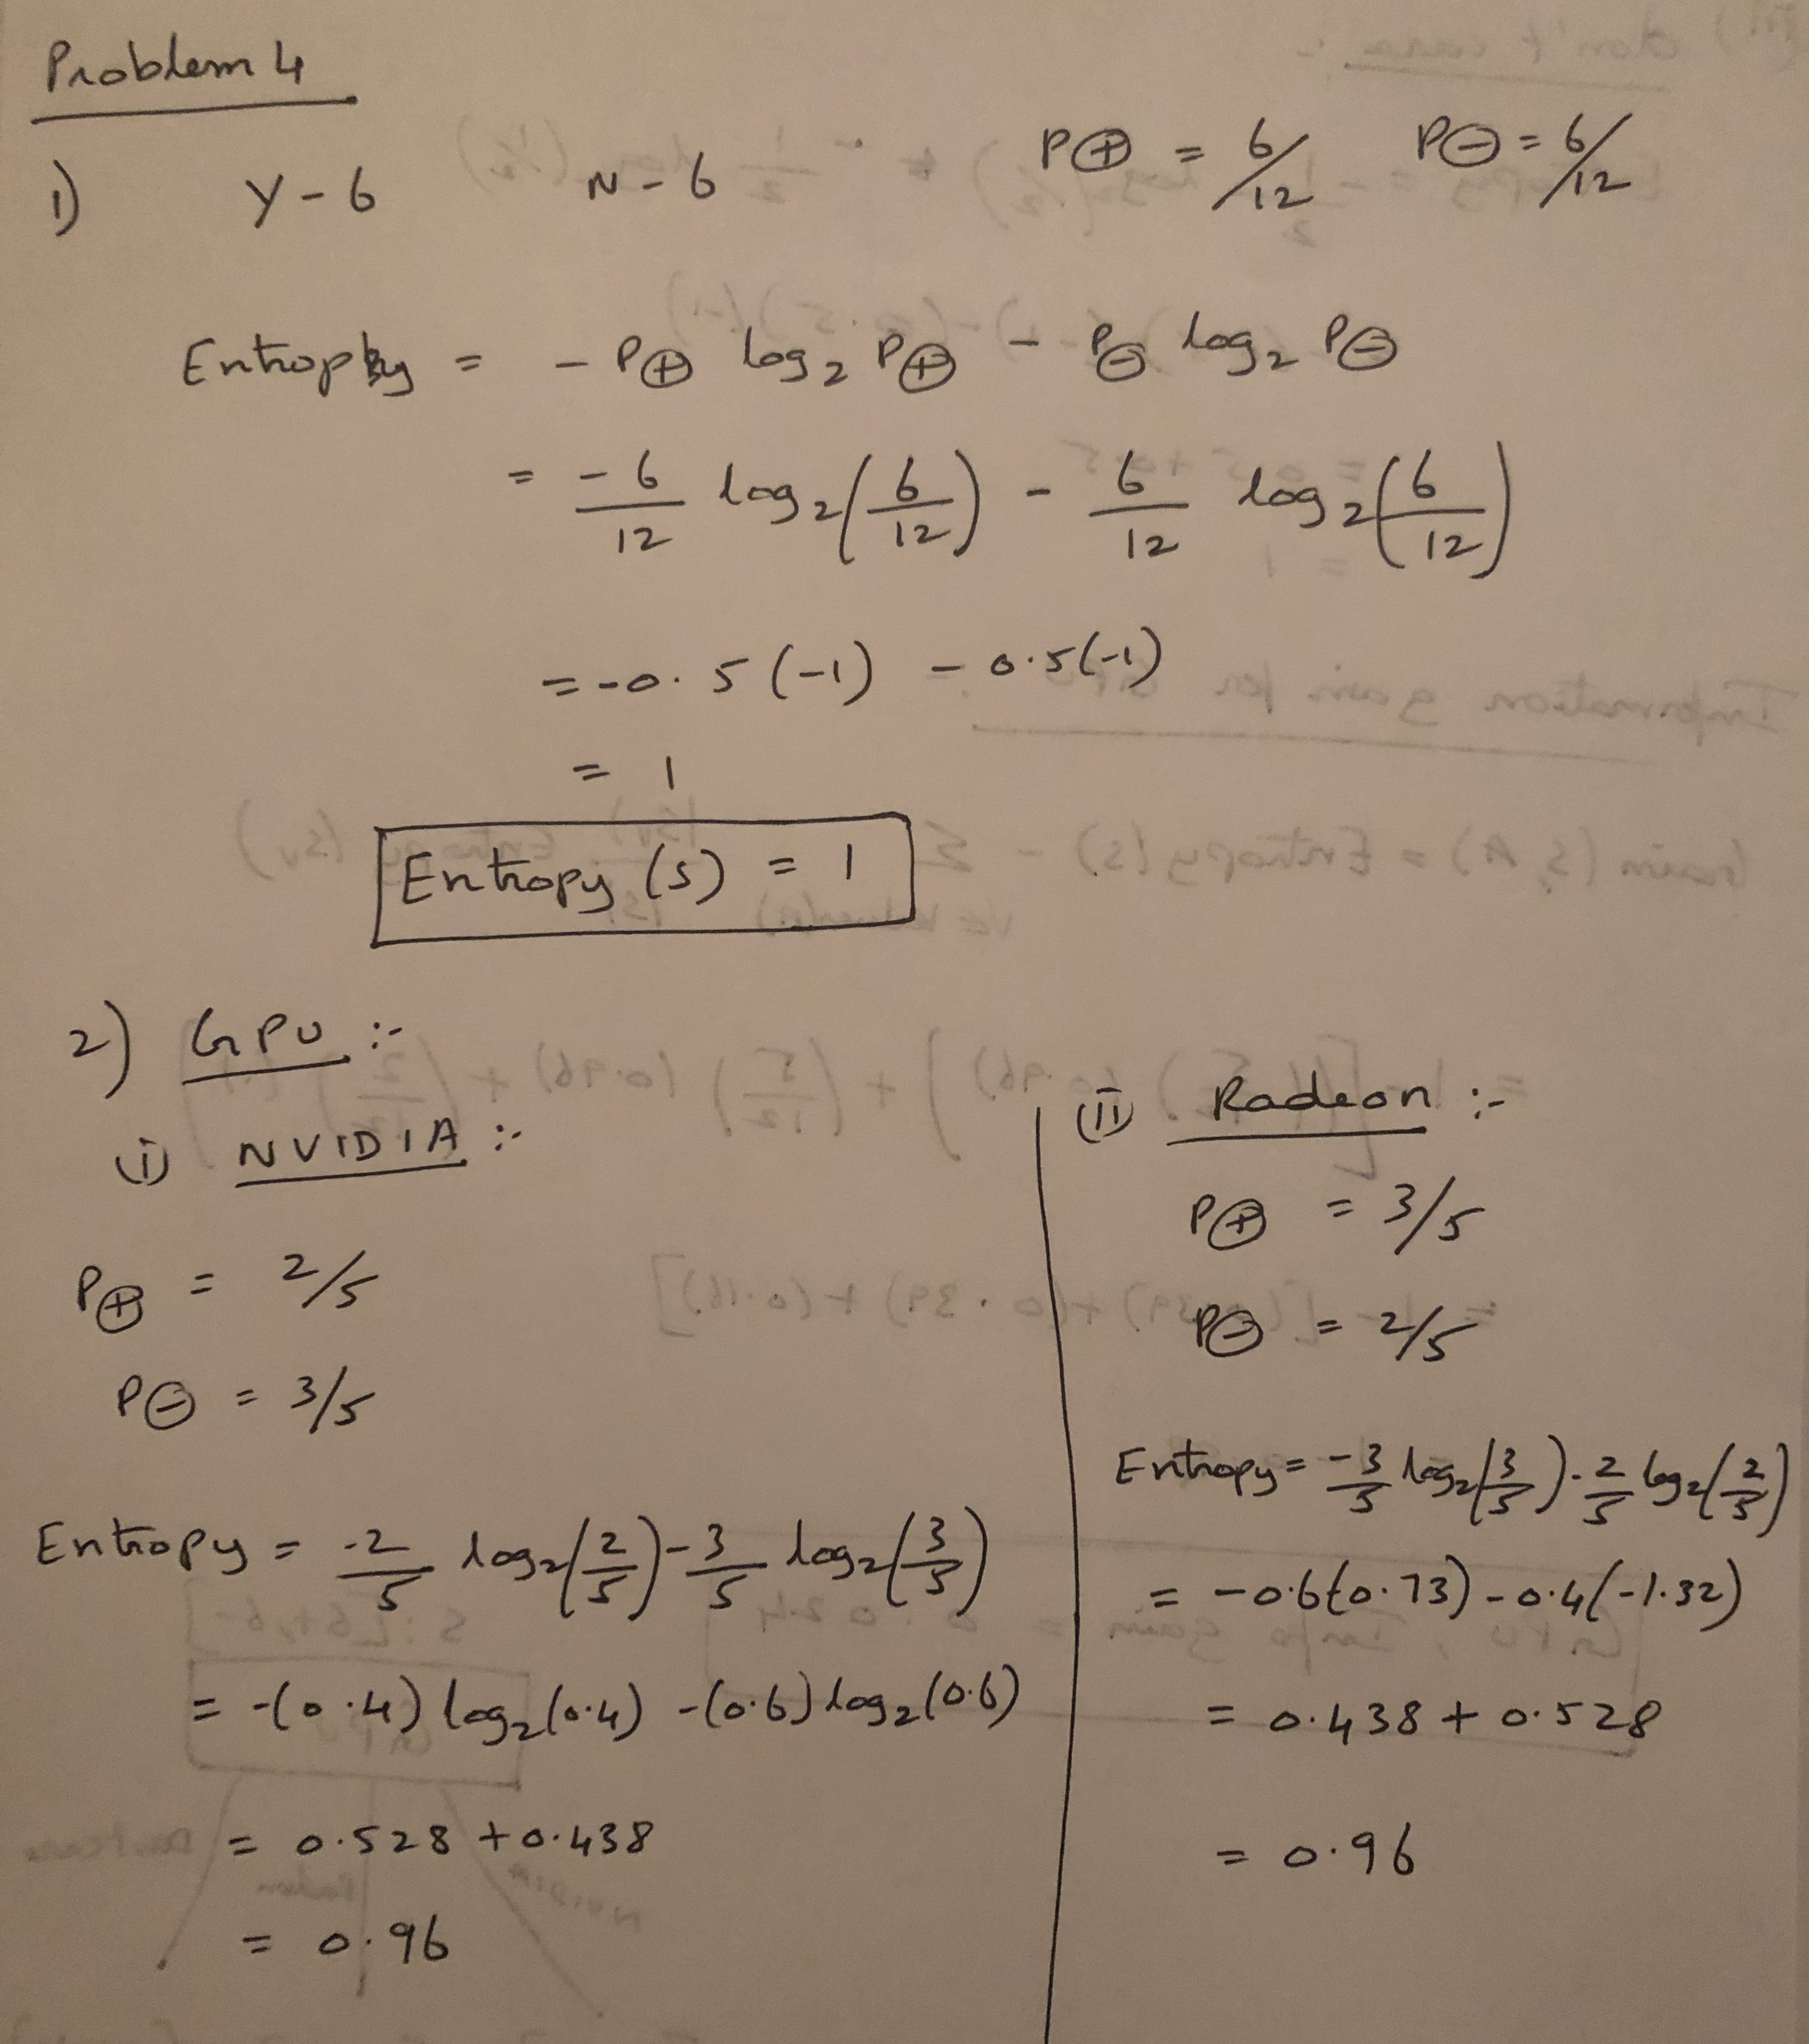

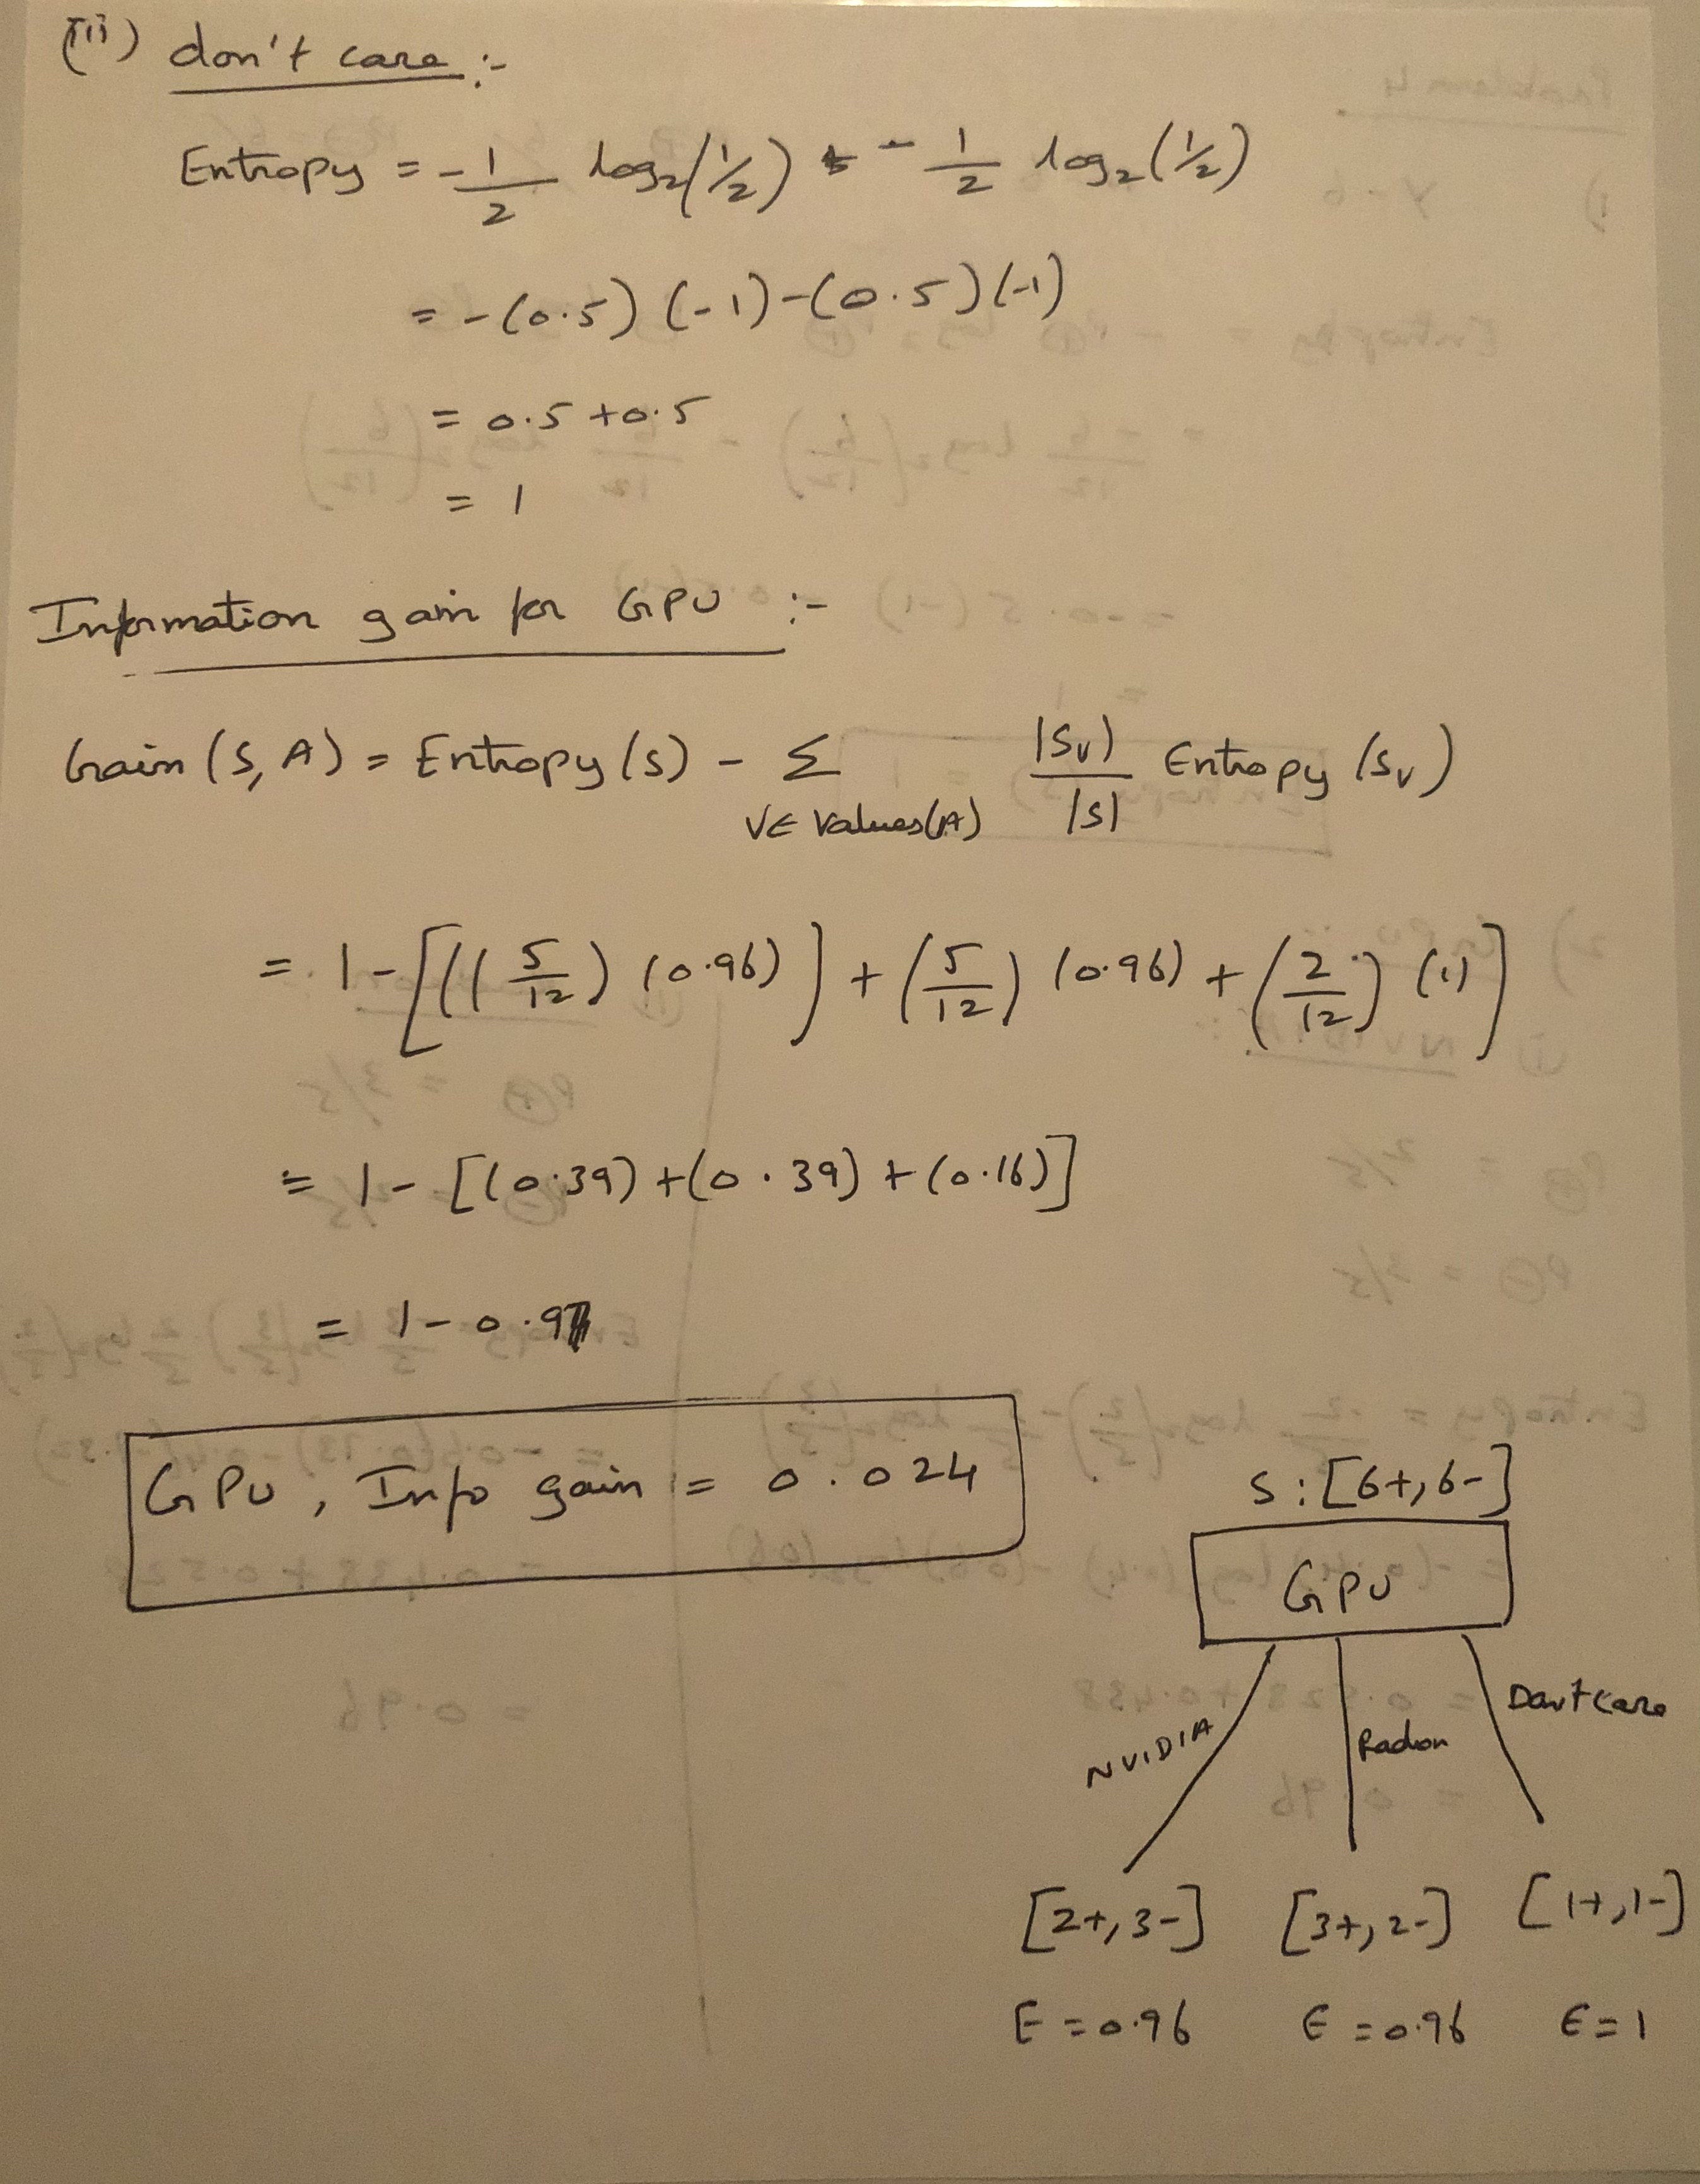

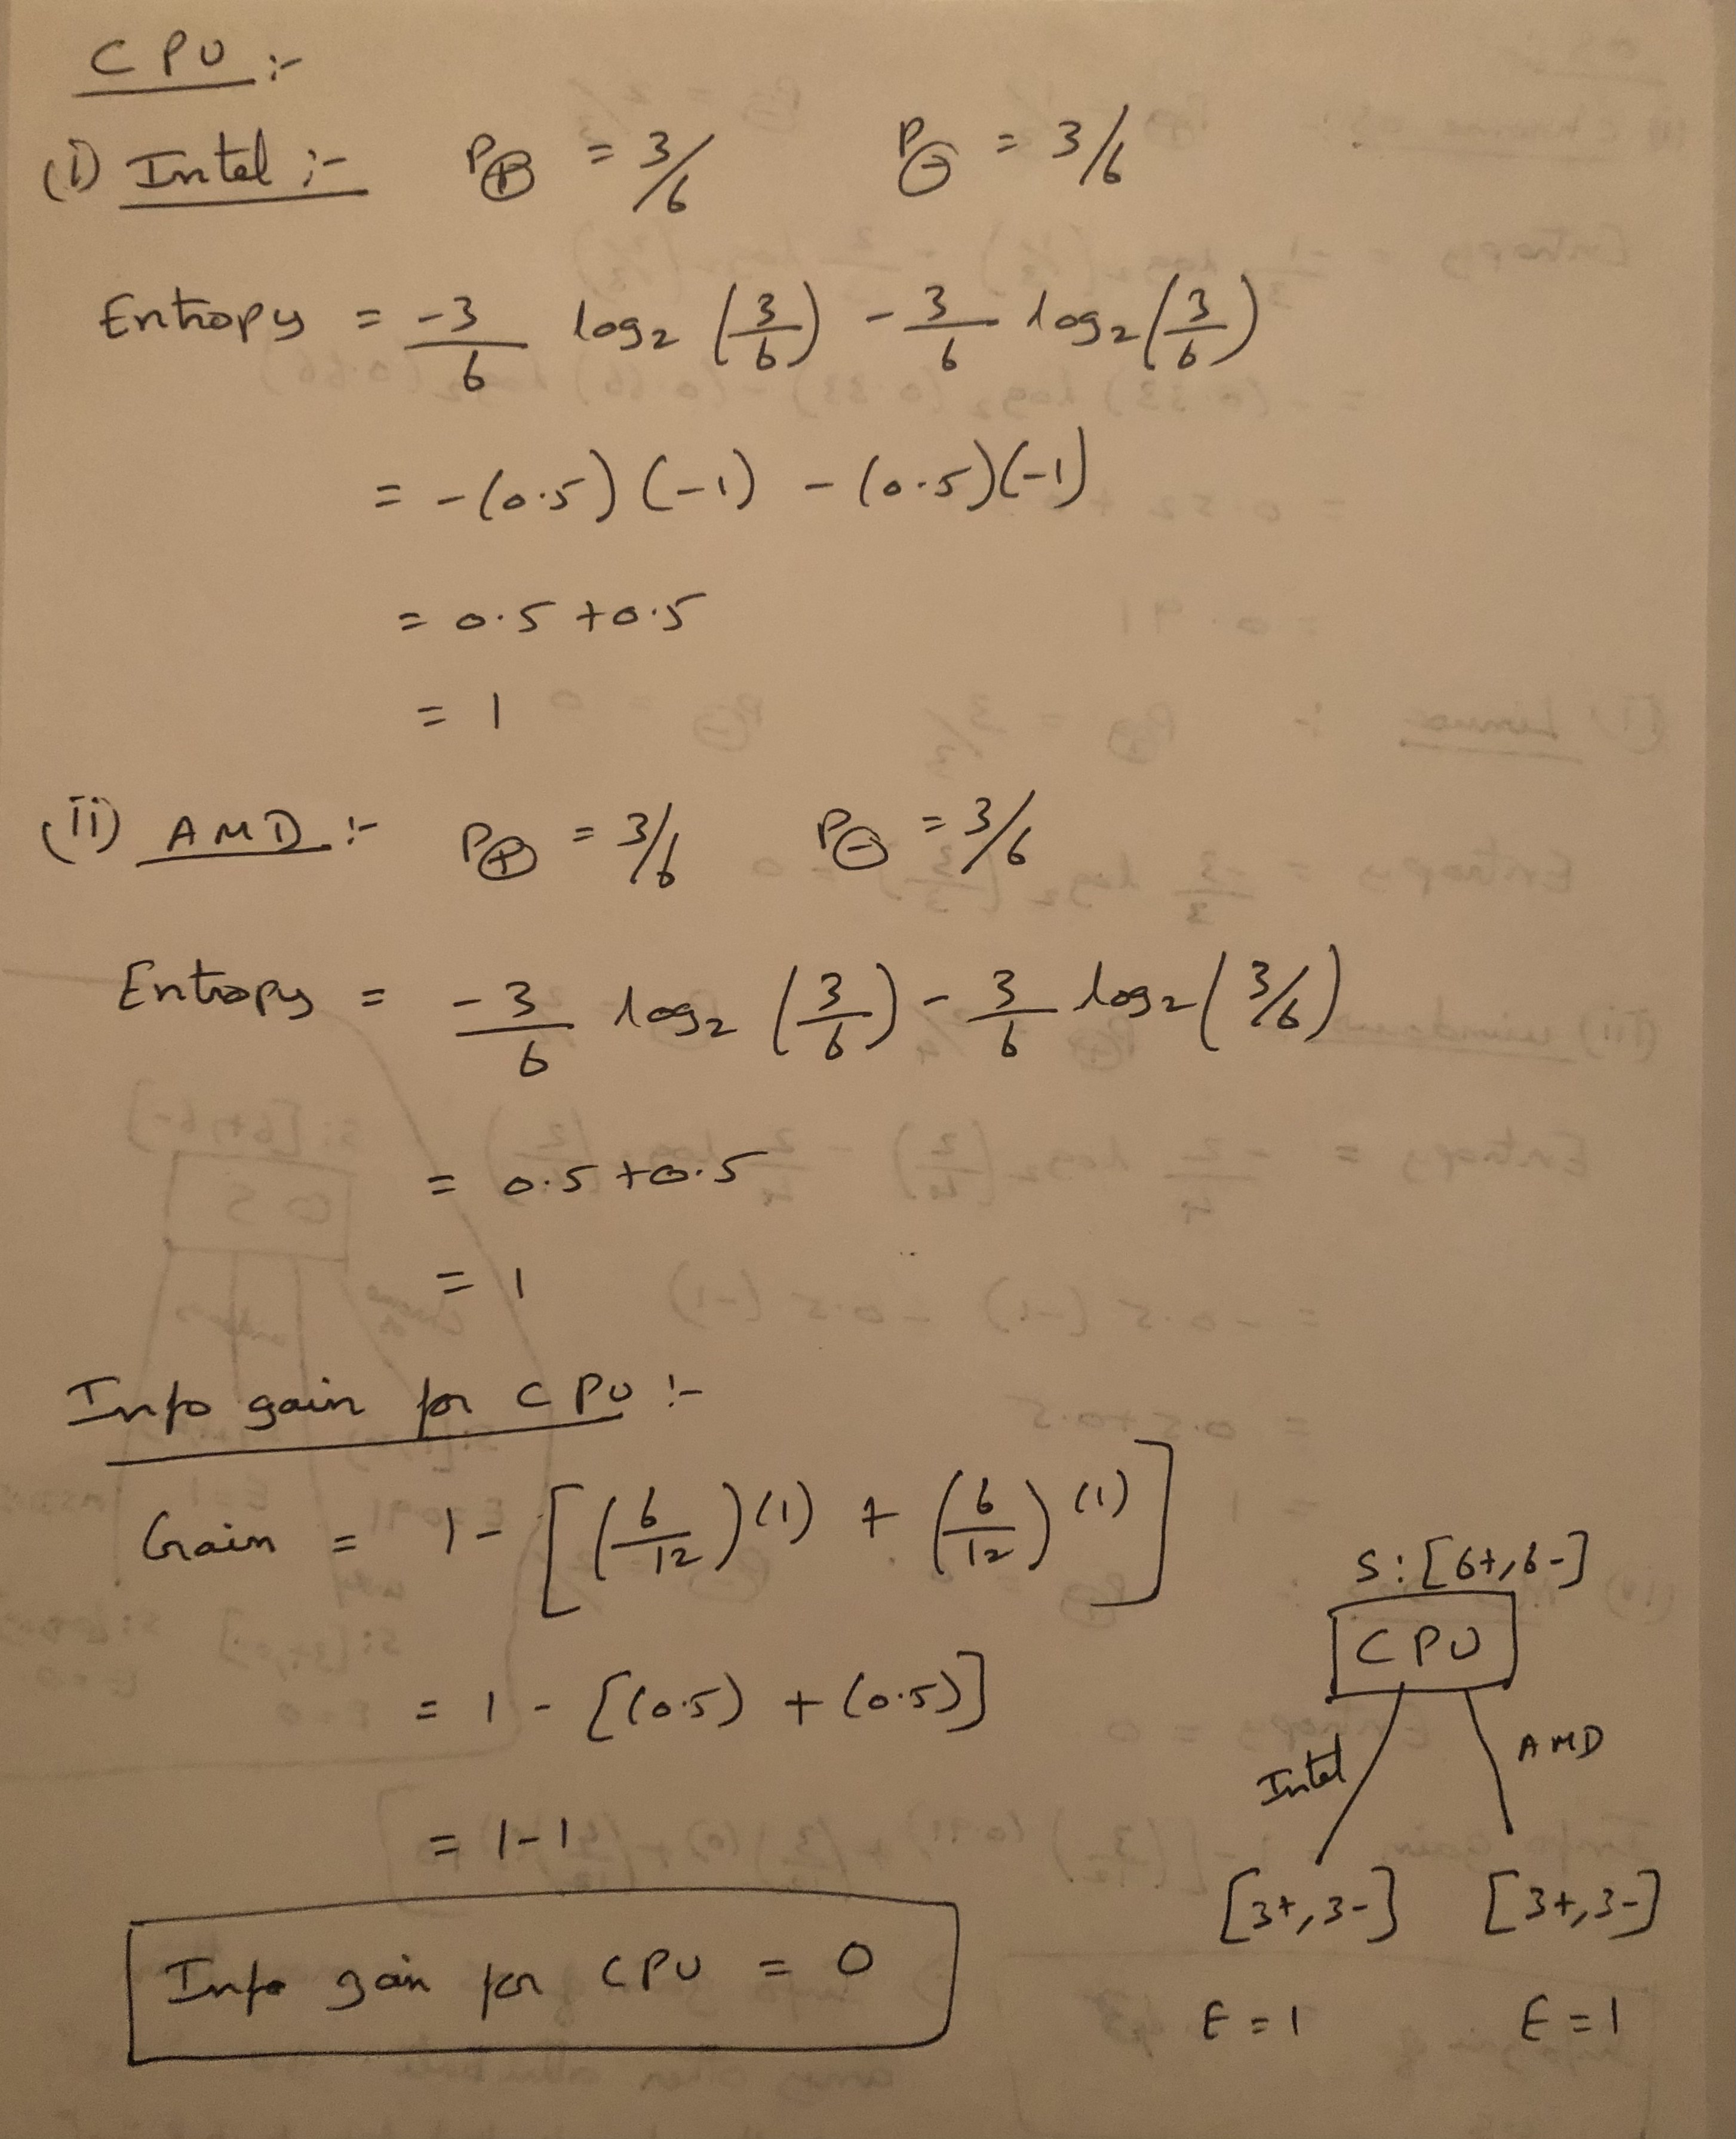

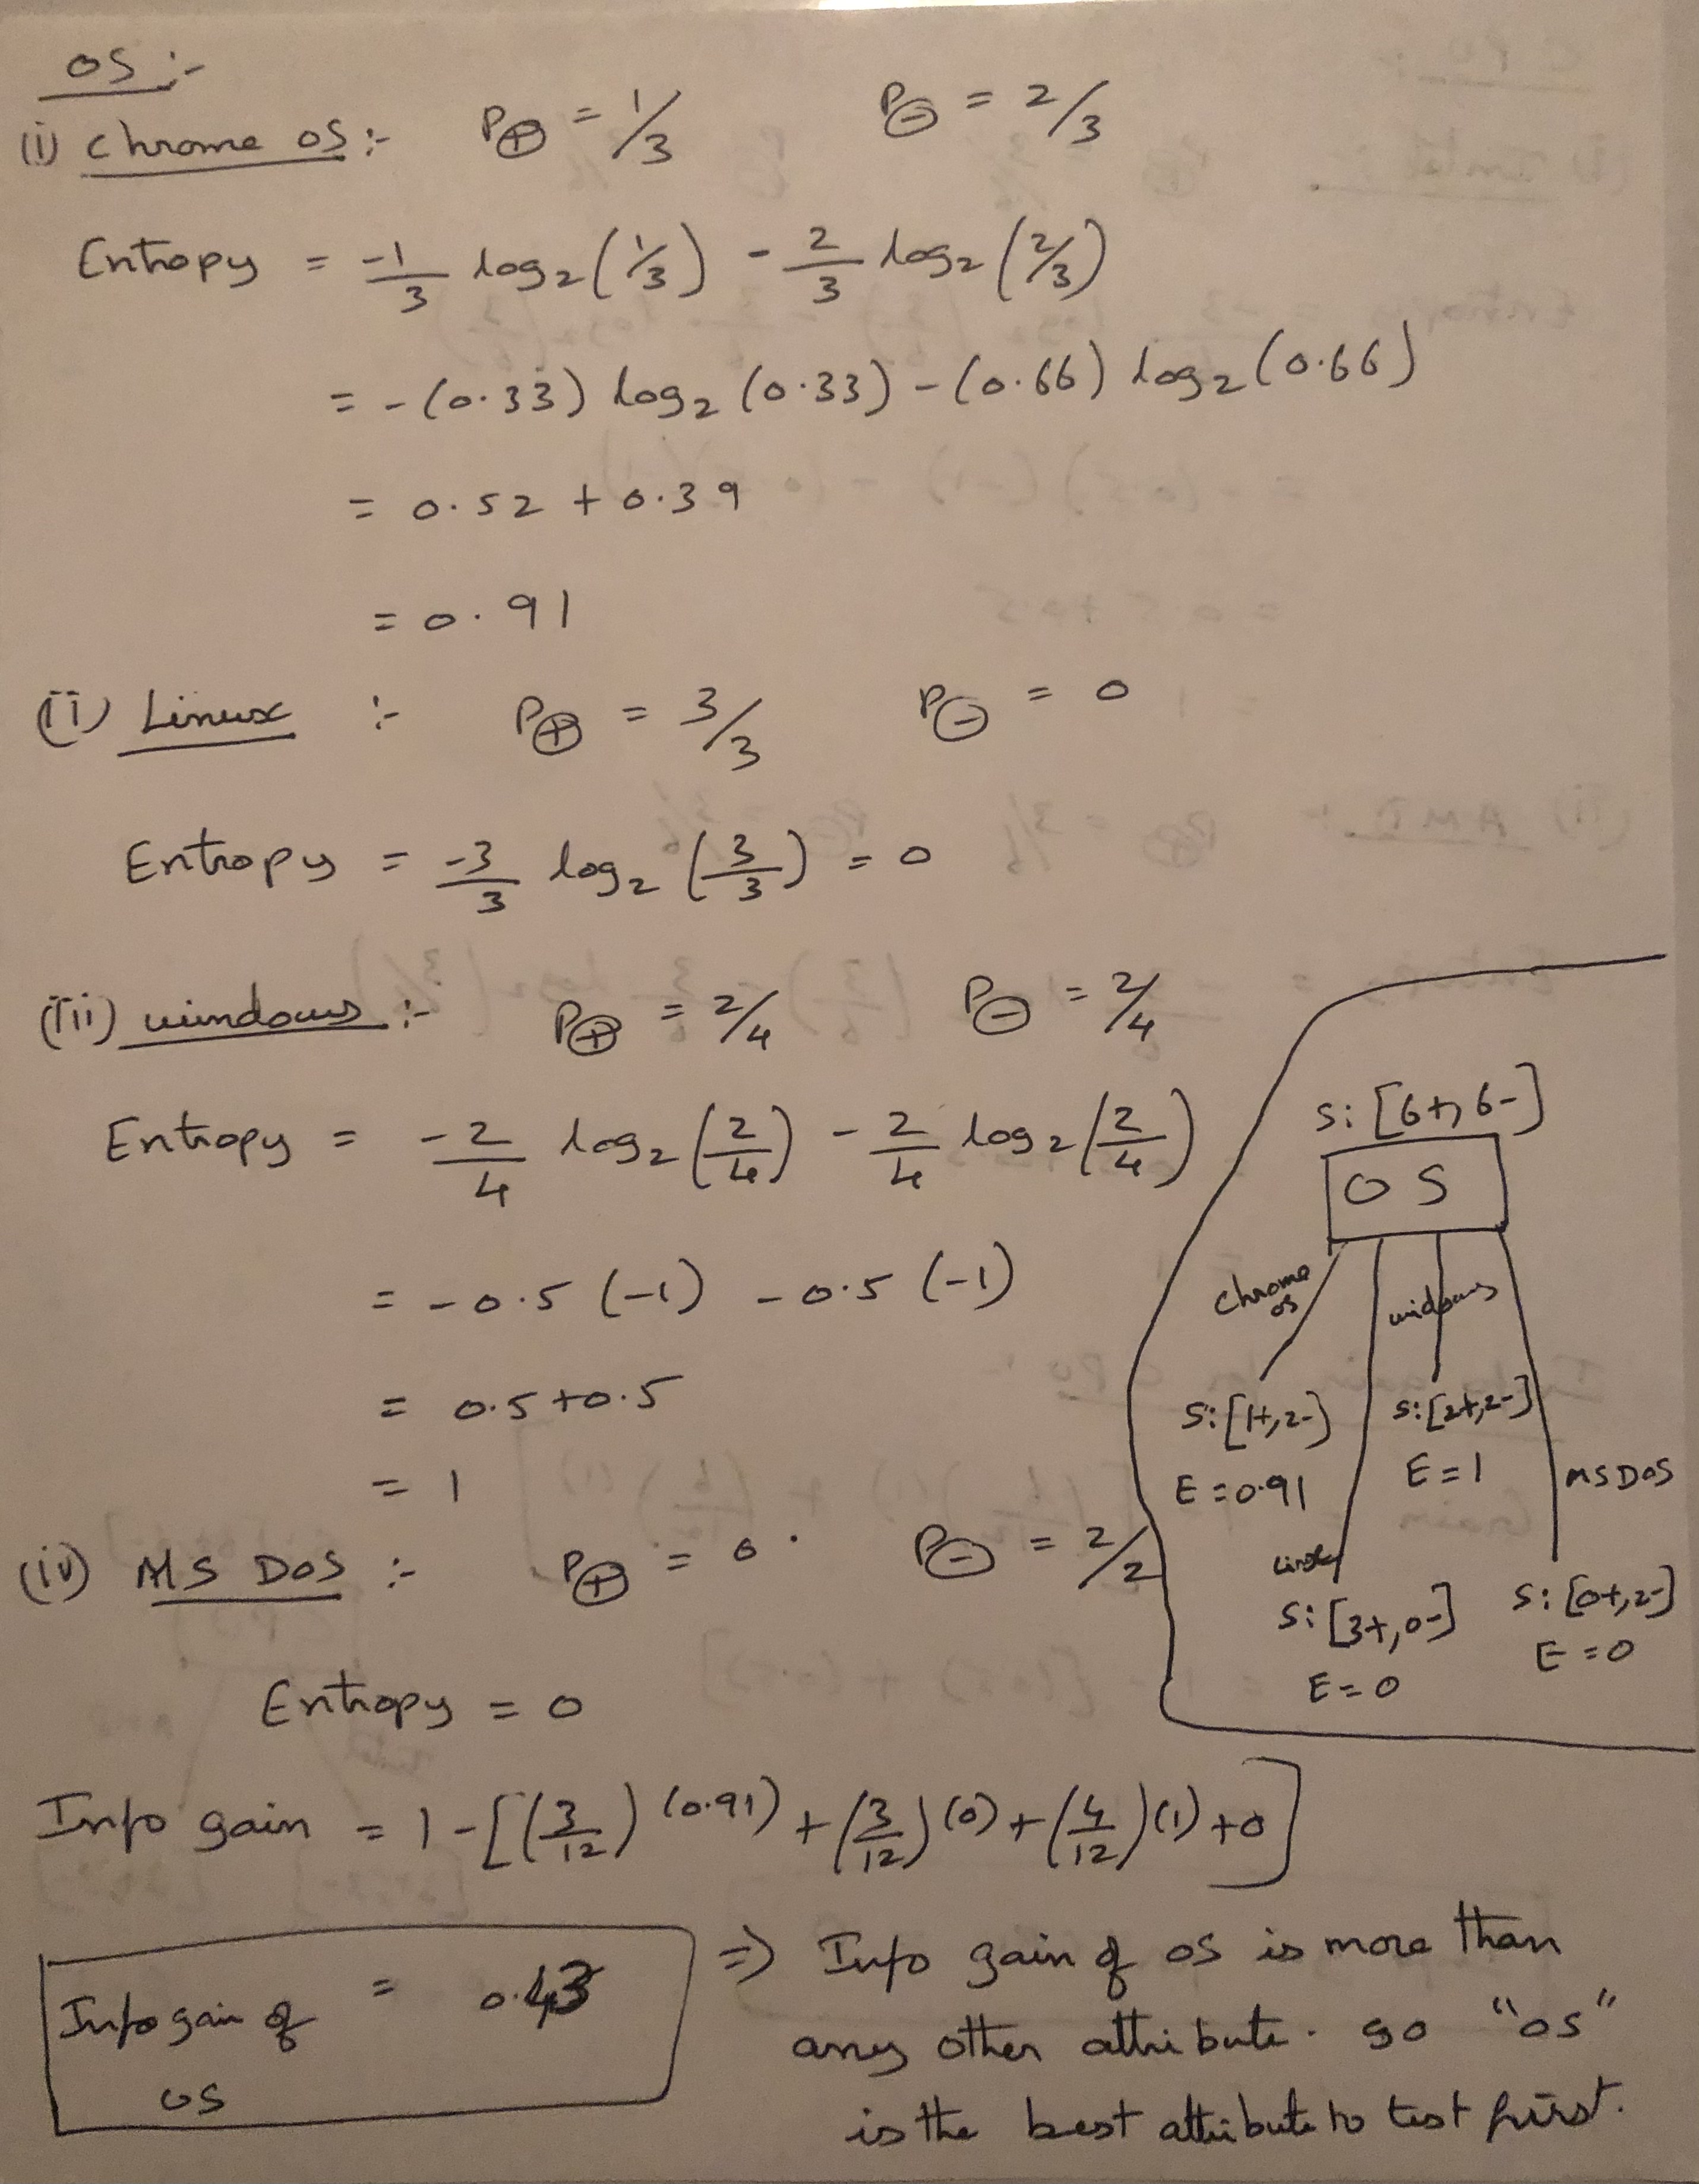

**Answer:**

(1)

(2) Show all intermediate steps, and include drawings of the partial tree. 

(3)

**Problem 5 (Program: 20pts)**

(1) Write a short program the compute the information gain, given the original data set's postive/negative sample count, and the resulting branches based on the attribute values and their positive/negative sample counts. Below is a stub code, which shows the testing scenario with the situation shown in the figure below (Figure 2). Note that the "after" matrix can have an arbitrary number of rows (for example, if the attribute has three possible values, there will be three rows in the matrix). The function must 

1. support attributes with an arbitrary number of attribute values, and 
2. check for error in the arguments (if +/- count before and after all sums up to be the same).

(2) Using the data set in Table 1, for each attribute, compute the info gain, using your info_gain() function, and report the resulting values.

(3) After choosing the best attribute from step (2), repeat the process for the resulting branches, to select the next attribute to test for each branch. If some branch is already a leaf, no need to repeat the info_gain computation. For example, if "GPU" was the best attribute, do the analysis for branches "NVIDIA", "RADEON", and "don't care". 

<figure>
<center>
<img 
 src="https://drive.google.com/uc?export=view&id=1mzt9xb2L7Xwf7Ka6vrt51b_Ws58M-zPT" height="450px"> 
<figcaption>Figure 2. Information Gain example</figcaption></center>
</figure>


**Answer:** 

(1) Fill out the code cell below

Entrophy(S) = 1

(2) Info gain for 
* GPU: info gain = 0.024 
* CPU: info gain = 0
* OS: info gain = 0.43 -> best attribute with max info gain

(3) Info gain for OS split

* Branch: chrome OS
* GPU info gain : 0.25
* CPU info gain : 0.25

 * linux: is a leaf node

* Branch: windows
  * GPU info gain = 0.5
  * CPU info gain = 0.31
   CPU is choosen as it has maximum info gain.

 * Branch: MS DOS is a leaf node.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. define your entropy function here. Note: this has to be defined specifically for this case: p+ and p-. 
#  The entropy function defined in problem 2 is for three possible values, not +/-.  
def Entropy(Pplus):
  Pminus = 1-Pplus 
  #E = -Pplus* np.log2(Pplus) - Pminus*np.log2(Pminus)
  #print(E)  

# alternatively, you can define it like below.
def Entropy2(num_positive, num_negative):
  print("nothing here yet")
  # Pplus = ...
  # Pminus = ...
  # return ....

# 2. define your info_gain function here 
def info_gain(before, after):

  # "before" is a vector of two values = [#positive, #negative]
  #before= [6,6]
  print("Before testing:")
  print(before)
  # "after" is a matrix of n rows and 2 columns. Each row corresponds to the attribute value, and the columns correspond to #positive, #negative.
  
  #after = [[2,3],
  #         [3,2],
   #        [1,1]]
  print("After testing:")
  print(after)
  Sum_Entrophy_sv = 0

  # You have to define the value below.
  # You cannot directly plug in the +,- value vector into the Entropy function.
  # You have to first convert the +,- values to probabilities p+ and p-. 
  Entrophy_S = - (before[0]/sum(before)) * np.log2(before[0]/sum(before)) - ((before[1]/sum(before)) * np.log2(before[1]/sum(before)))
  print(Entrophy_S)
  for x in after:
    Sum_Entrophy_sv += - ((x[0]/sum(x)) * np.log2(x[0]/sum(x)) + (x[1]/sum(x)) * np.log2(x[1]/sum(x))) * (sum(x)/sum(before))
    
  gain = Entrophy_S - Sum_Entrophy_sv 


  print("Info gain="+str(gain),end="")

# 3. Test function (see Figure 2 above)
print("For GPU")
before = np.array([6,6])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[2,3], [3,2], [1,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

# or, you can just call it like this: 
#info_gain([])

print("\n\nFor CPU")
before = np.array([6,6])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[3,3], [3,3]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

print("\n\nFor OS")
before = np.array([6,6])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[1,2], [2,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# [3,0] and [0,2] not included as it gives entrophy 0
info_gain(before, after)

print("\n\nFor chrome OS: GPU")
before = np.array([1,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[1,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# [0,1] not included as it gives entrophy 0
info_gain(before, after)

print("\n\nFor chrome OS: CPU")
before = np.array([1,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[1,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# [0,1] not included as it gives entrophy 0
info_gain(before, after)

print("\n\nFor chrome OS: CPU")
before = np.array([1,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[1,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# [0,1] not included as it gives entrophy 0
info_gain(before, after)

# linux entrophy is 0 so leaf

print("\n\nFor Windows: GPU")
before = np.array([2,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[1,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# [0,1] and [1,0] not included 
info_gain(before, after)

print("\n\nFor Windows: CPU")
before = np.array([2,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[1,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
#  [1,0] not included 
info_gain(before, after)

# branch MS DOS is leaf as it has entrophy 0

For GPU
Before testing:
[6 6]
After testing:
[[2 3]
 [3 2]
 [1 1]]
1.0
Info gain=0.024207837954442812

For CPU
Before testing:
[6 6]
After testing:
[[3 3]
 [3 3]]
1.0
Info gain=0.0

For OS
Before testing:
[6 6]
After testing:
[[1 2]
 [2 2]]
1.0
Info gain=0.43709270815304424

For chrome OS: GPU
Before testing:
[1 2]
After testing:
[[1 1]]
0.9182958340544896
Info gain=0.2516291673878229

For chrome OS: CPU
Before testing:
[1 2]
After testing:
[[1 1]]
0.9182958340544896
Info gain=0.2516291673878229

For chrome OS: CPU
Before testing:
[1 2]
After testing:
[[1 1]]
0.9182958340544896
Info gain=0.2516291673878229

For Windows: GPU
Before testing:
[2 2]
After testing:
[[1 1]]
1.0
Info gain=0.5

For Windows: CPU
Before testing:
[2 2]
After testing:
[[1 2]]
1.0
Info gain=0.31127812445913283

**Problem 6 (Written: 20pts)**

Apply your info_gain function to analyze the following data set and report the results. 

(1) Repeat the steps in Problem 5(2) applied to data in Table 2 below. Show the output of your info_gain function.

(2) Repeat the steps in Problem 5(3) applied to data in Table 2 below. Show the output of your info_gain function.

(3) Verify your results using the code example below, using scikit-learn's decision tree algorithm. Note: scikit-learn does not support multi-value attributes (thus all the branches are binary). The data set below is set up so that you can use sci-kit-learn (you cannot use this for the data in Table 1, since it includes multi-value attributes). 

**NOTE: the data set may look similar to the one in the slides, but it is not identical, so the results will be different.**

> TABLE 2

> Instance # | Outlook | Temperature | Humidity | Wind | PlayTennis
> --- | --- | --- | --- | --- | ---
> D1 | Sunny    | Hot | High | Weak | Yes
> D2 | Sunny    | Hot | High | Strong | No
> D3 | Overcast | Hot | High | Weak | Yes
> D4 | Overcast | Cool | High | Weak | Yes
> D5 | Overcast | Cool | Normal | Weak | No
> D6 | Overcast | Cool | Normal | Strong | No
> D7 | Overcast | Hot | Normal | Strong | No
> D8 | Sunny    | Cool | High | Weak | Yes
> D9 | Sunny    | Cool | Normal | Weak | Yes
> D10 | Sunny   | Hot | Normal | Weak | Yes
> D11 | Sunny   | Cool | Normal | Strong | No
> D12 | Overcast| Cool | High | Strong | No
> D13 | Overcast| Hot | Normal | Weak | No
> D14 | Sunny   | Cool | High | Strong | No



**Answer:**

(1) Info gain for 
* Outlook: info gain = 0.06
* Temperature: info gain = 0.01
* Humidity: info gain = 0.06
* Wind: info gain = 0.52 -> best attribute choosen

(2) Info gain for 
* wind: weak  
 * Outlook: info gain = 0.31 -> this is choosen as best
 * Temperature : info gain = 0
 * Humidity : info gain = 0.31

 * Wind - Strong is a leaf

* Branch: outlook : overcast: 
 * Temperature: info gain = 0 
 * Humidity: info gain = 1 -> choosen as the best. 

(3) Enter the data in the code cell below and run it to verify your results above.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. define your entropy function here. Note: this has to be defined specifically for this case: p+ and p-. 
#  The entropy function defined in problem 2 is for three possible values, not +/-.  
def Entropy(Pplus):
  Pminus = 1-Pplus 
  #E = -Pplus* np.log2(Pplus) - Pminus*np.log2(Pminus)
  #print(E)  

# alternatively, you can define it like below.
def Entropy2(num_positive, num_negative):
  print("nothing here yet")
  # Pplus = ...
  # Pminus = ...
  # return ....

# 2. define your info_gain function here 
def info_gain(before, after):

  # "before" is a vector of two values = [#positive, #negative]
  #before= [6,6]
  print("Before testing:")
  print(before)
  # "after" is a matrix of n rows and 2 columns. Each row corresponds to the attribute value, and the columns correspond to #positive, #negative.
  
  #after = [[2,3],
  #         [3,2],
   #        [1,1]]
  print("After testing:")
  print(after)
  Sum_Entrophy_sv = 0

  # You have to define the value below.
  # You cannot directly plug in the +,- value vector into the Entropy function.
  # You have to first convert the +,- values to probabilities p+ and p-. 
  Entrophy_S = - (before[0]/sum(before)) * np.log2(before[0]/sum(before)) - ((before[1]/sum(before)) * np.log2(before[1]/sum(before)))
  print(Entrophy_S)
  for x in after:
    Sum_Entrophy_sv += - ((x[0]/sum(x)) * np.log2(x[0]/sum(x)) + (x[1]/sum(x)) * np.log2(x[1]/sum(x))) * (sum(x)/sum(before))
    
  gain = Entrophy_S - Sum_Entrophy_sv 


  print("Info gain="+str(gain),end="")

# 3. Test function (see Figure 2 above)
print("For Outlook")
before = np.array([6,8])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[4,3], [2,5]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

print("\n\nFor Temperature")
before = np.array([6,8])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[3,3], [3,5]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

print("\n\nFor Humidity")
before = np.array([6,8])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[4,3], [2,5]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

print("\n\nFor Wind")
before = np.array([6,8])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([[6,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
#[0,6] not included
info_gain(before, after)

print("\n\nFor wind: weak : outlook")
before = np.array([6,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([ [2,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
#[4,0] not included
info_gain(before, after)

print("\n\nFor wind: weak : Temperature")
before = np.array([6,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([ [3,1], [3,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

print("\n\nFor wind: weak : Humidity")
before = np.array([6,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([ [2,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
#[4,0] not included
info_gain(before, after)

print("\n\nFor outlook: overcast: temperature")
before = np.array([2,4])  # +9, -5 is entered like this (9 positive,5 negative samples)
after  = np.array([ [1,2], [1,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
info_gain(before, after)

#print("\n\nFor outlook: overcast: Humidity")
#before = np.array([2,2])  # +9, -5 is entered like this (9 positive,5 negative samples)
#after  = np.array([ [2,0],[0,2]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# info gain is 1
#info_gain(before, after)

For Outlook
Before testing:
[6 8]
After testing:
[[4 3]
 [2 5]]
0.9852281360342515
Info gain=0.06105378373381021

For Temperature
Before testing:
[6 8]
After testing:
[[3 3]
 [3 5]]
0.9852281360342515
Info gain=0.011265848648557397

For Humidity
Before testing:
[6 8]
After testing:
[[4 3]
 [2 5]]
0.9852281360342515
Info gain=0.06105378373381021

For Wind
Before testing:
[6 8]
After testing:
[[6 2]]
0.9852281360342515
Info gain=0.5216406363433185

For wind: weak : outlook
Before testing:
[6 2]
After testing:
[[2 2]]
0.8112781244591328
Info gain=0.31127812445913283

For wind: weak : Temperature
Before testing:
[6 2]
After testing:
[[3 1]
 [3 1]]
0.8112781244591328
Info gain=0.0

For wind: weak : Humidity
Before testing:
[6 2]
After testing:
[[2 2]]
0.8112781244591328
Info gain=0.31127812445913283

For outlook: overcast: temperature
Before testing:
[2 4]
After testing:
[[1 2]
 [1 2]]
0.9182958340544896
Info gain=0.0

In [ ]:
# write your function calls here

# (1)
# before = ...
# after = ... 
# info_gain (before, after)


# (2)
# before = ...
# after = ... 
# info_gain (before, after)

# (3): use the code cell below.


[Text(200.88000000000002, 190.26, 'X[3] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(133.92000000000002, 135.9, 'X[2] <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(66.96000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 135.9, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

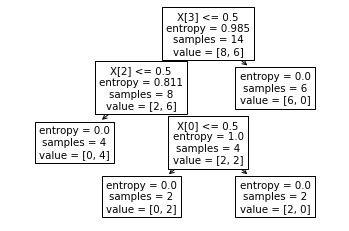

In [ ]:
# Testing scikit-learn's decision tree implementation. 

from sklearn import tree
import numpy as np 

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Outlook attribute, Sunny = 0, and Overcast = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
X = [[0,0,0,0], 
     [0,0,0,1],
     [1,0,0,0], 
     [1,1,0,0],
     [1,1,1,0],
     [1,1,1,1],
     [1,0,1,1],
     [0,1,0,0],
     [0,1,1,0],
     [0,0,1,0],
     [0,1,1,1],
     [1,1,0,1],
     [1,0,1,0],
     [0,1,0,1]]

# Enter the target data (PlayTennis) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]

y = [ 1, 
     0, 
     1, 
     1,
     0,
     0,
     0,
     1,
     1,
     1,
     0,
     0,
     0,
     0]
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples. *Note that the order is reversed, compared to the lecture slides.  
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in)
tree.plot_tree(clf)
